### Breast Cancer prediction using Keras
#### In this notebook, we will use Keras to build a sequential and a functional model to predict breast cancer.

In [1]:
# import libraries

import copy
import warnings
import pandas as pd
import numpy as np
import scipy.stats
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Download data
!gdown 'https://drive.google.com/u/0/uc?id=1A3Qk2qMk30PLvrDca5c6SFjb-StfqAYf&export=download'

Downloading...
From: https://drive.google.com/u/0/uc?id=1A3Qk2qMk30PLvrDca5c6SFjb-StfqAYf&export=download
To: /home/hossein/my-projects/hands-on-ai/keras/data_breast_cancer.csv
100%|█████████████████████████████████████████| 125k/125k [00:00<00:00, 239kB/s]


In [3]:
# Load data
df = pd.read_csv('data_breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Drop useless columns
columns_to_drop = ['id', 'Unnamed: 32']
df.drop(columns_to_drop, axis=1, inplace=True)

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Encode target
target_encoding = {'B': 0, 'M': 1}
df['diagnosis'] = df['diagnosis'].map(target_encoding)

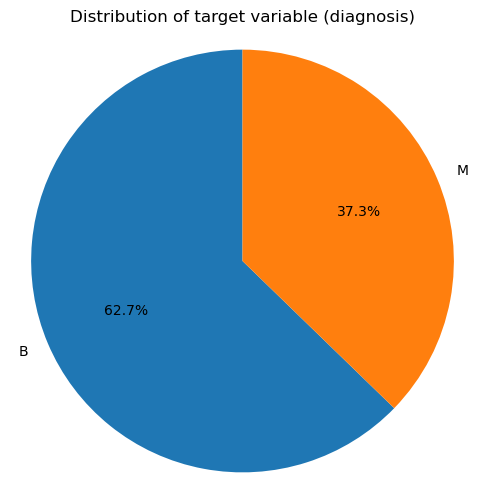

In [8]:
# Check if target variable is balanced
labels = list(target_encoding.keys())
sizes = df['diagnosis'].value_counts().values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of target variable (diagnosis)')
plt.axis('equal')
plt.show()


In [9]:
# Calculate the Point-Biserial Correlation with target
feature_columns = df.columns.drop('diagnosis').values
feature_target_correlation = pd.DataFrame()
correlations = []
for col in feature_columns:
    point_biserial_corr, _ = scipy.stats.pointbiserialr(df['diagnosis'], df[col])
    correlations.append(point_biserial_corr)
feature_target_correlation['features'] = feature_columns
feature_target_correlation['correlation with target'] = correlations
feature_target_correlation.sort_values(by='correlation with target', key=lambda x: x.abs(), ascending=False, inplace=True)
feature_target_correlation.reset_index(drop=True, inplace=True)

# Show features correlation with target in descending order
feature_target_correlation.head()

,features,correlation with target
0,concave points_worst,0.793566
1,perimeter_worst,0.782914
2,concave points_mean,0.776614
3,radius_worst,0.776454
4,perimeter_mean,0.742636


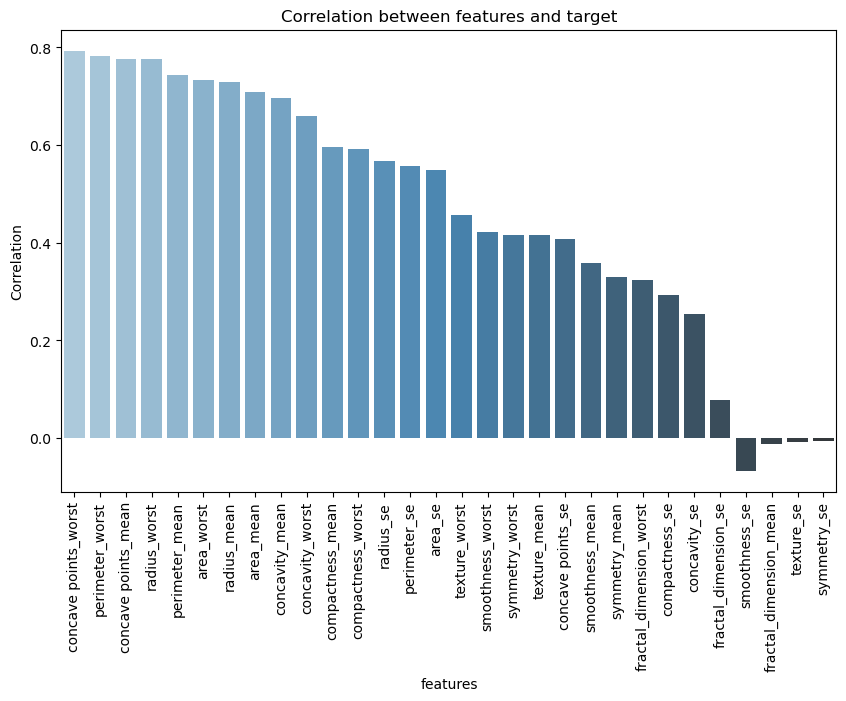

In [10]:
# Plot the correlation
plt.figure(figsize=(10, 6))
sns.barplot(x='features', y='correlation with target', data=feature_target_correlation, palette='Blues_d')
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.title('Correlation between features and target')
plt.show()

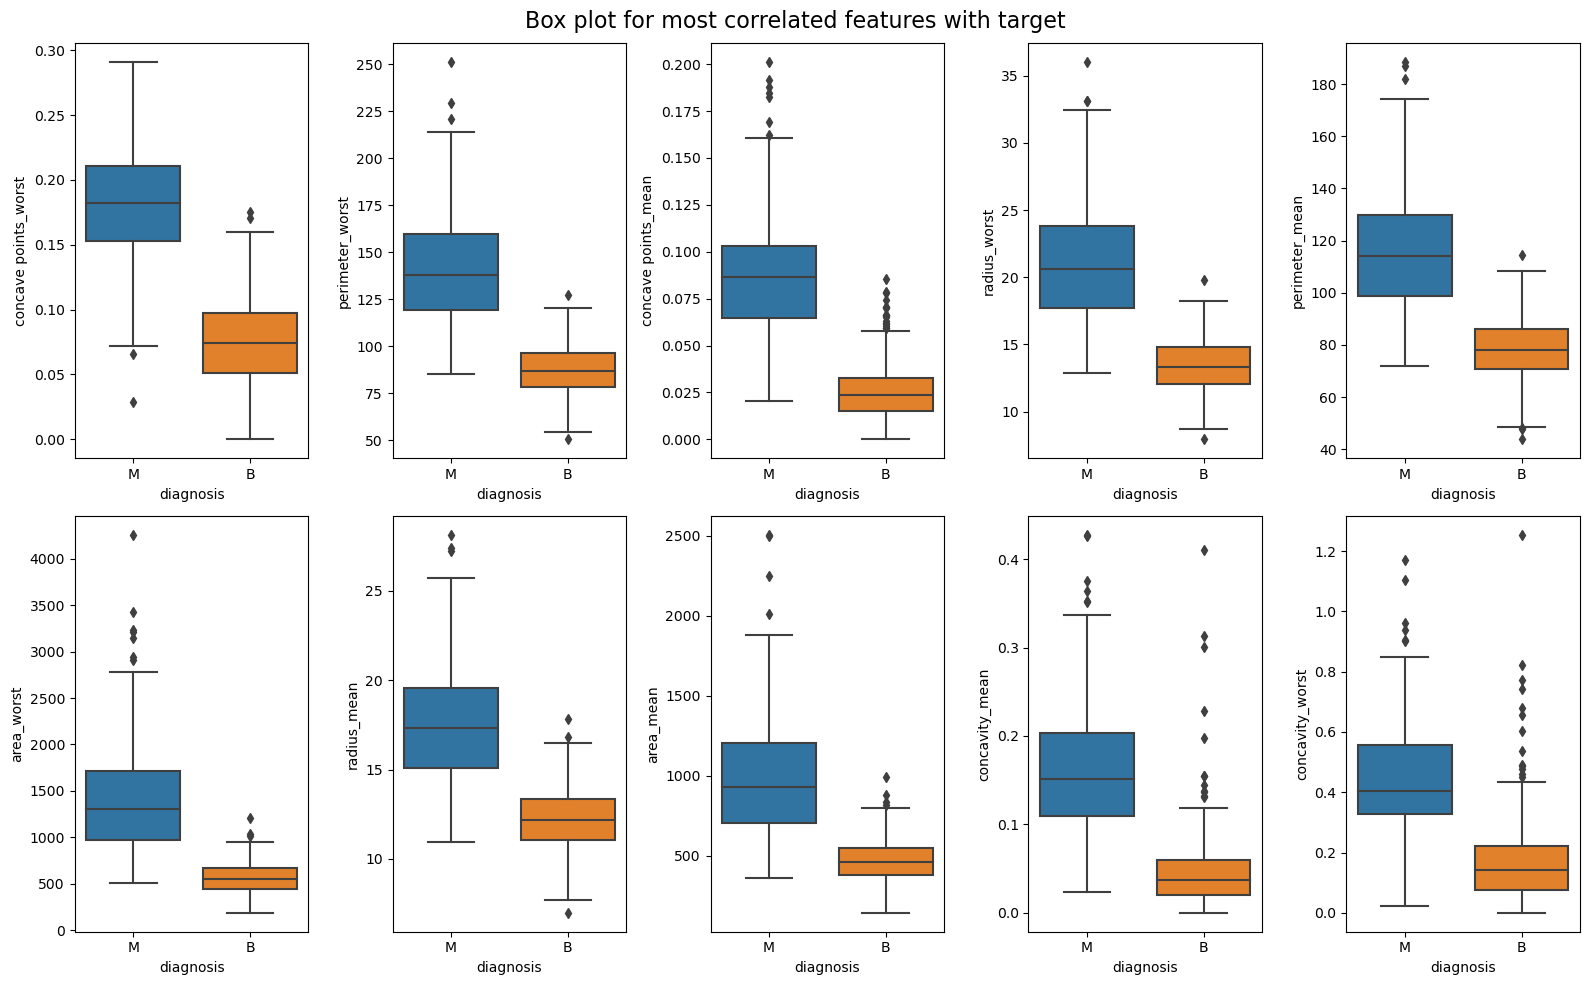

In [11]:
# Plot box plot for 10 best features
best_features = feature_target_correlation['features'][:10].values
df_best_features = df.loc[:, best_features]
df_best_features['diagnosis'] = df['diagnosis'].map({0: 'B', 1: 'M'})
fig, axes = plt.subplots(2, 5, figsize=(16, 10))
fig.suptitle('Box plot for most correlated features with target', fontsize=16)
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='diagnosis', y=best_features[i], data=df_best_features, ax=ax)
plt.tight_layout()
plt.show()

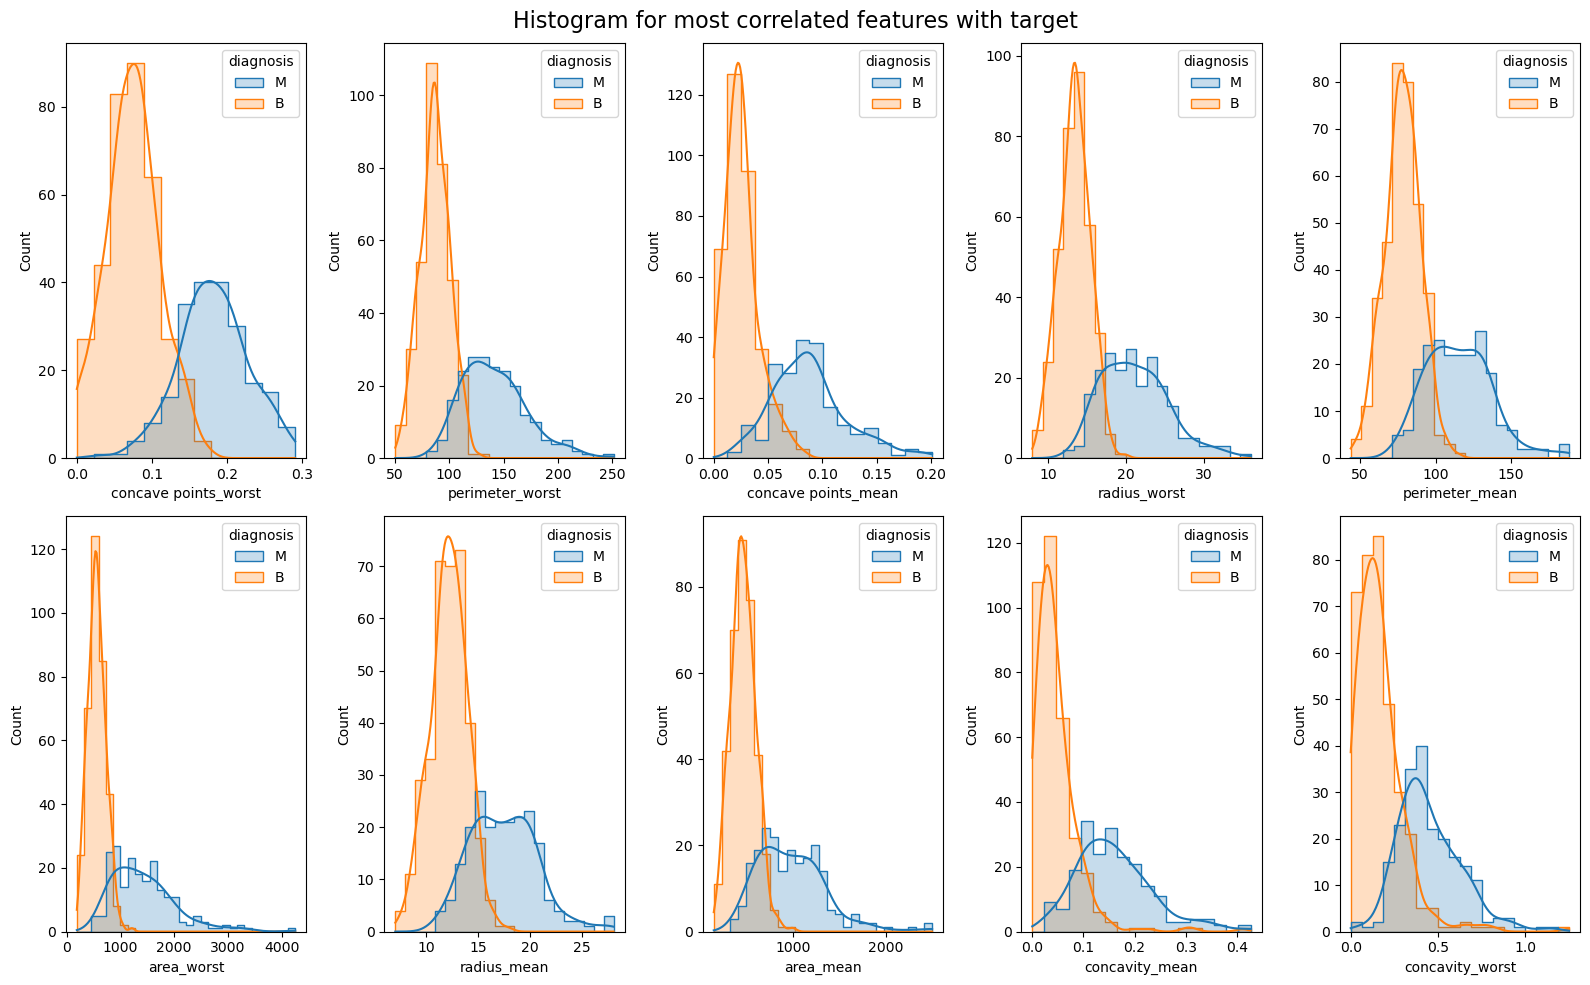

In [12]:
# Plot histogram for 10 best features
fig, axes = plt.subplots(2, 5, figsize=(16, 10))
fig.suptitle('Histogram for most correlated features with target', fontsize=16)
for i, ax in enumerate(axes.flatten()):
    sns.histplot(x=best_features[i], data=df_best_features, ax=ax, hue='diagnosis', element='step', kde=True)
plt.tight_layout()
plt.show()

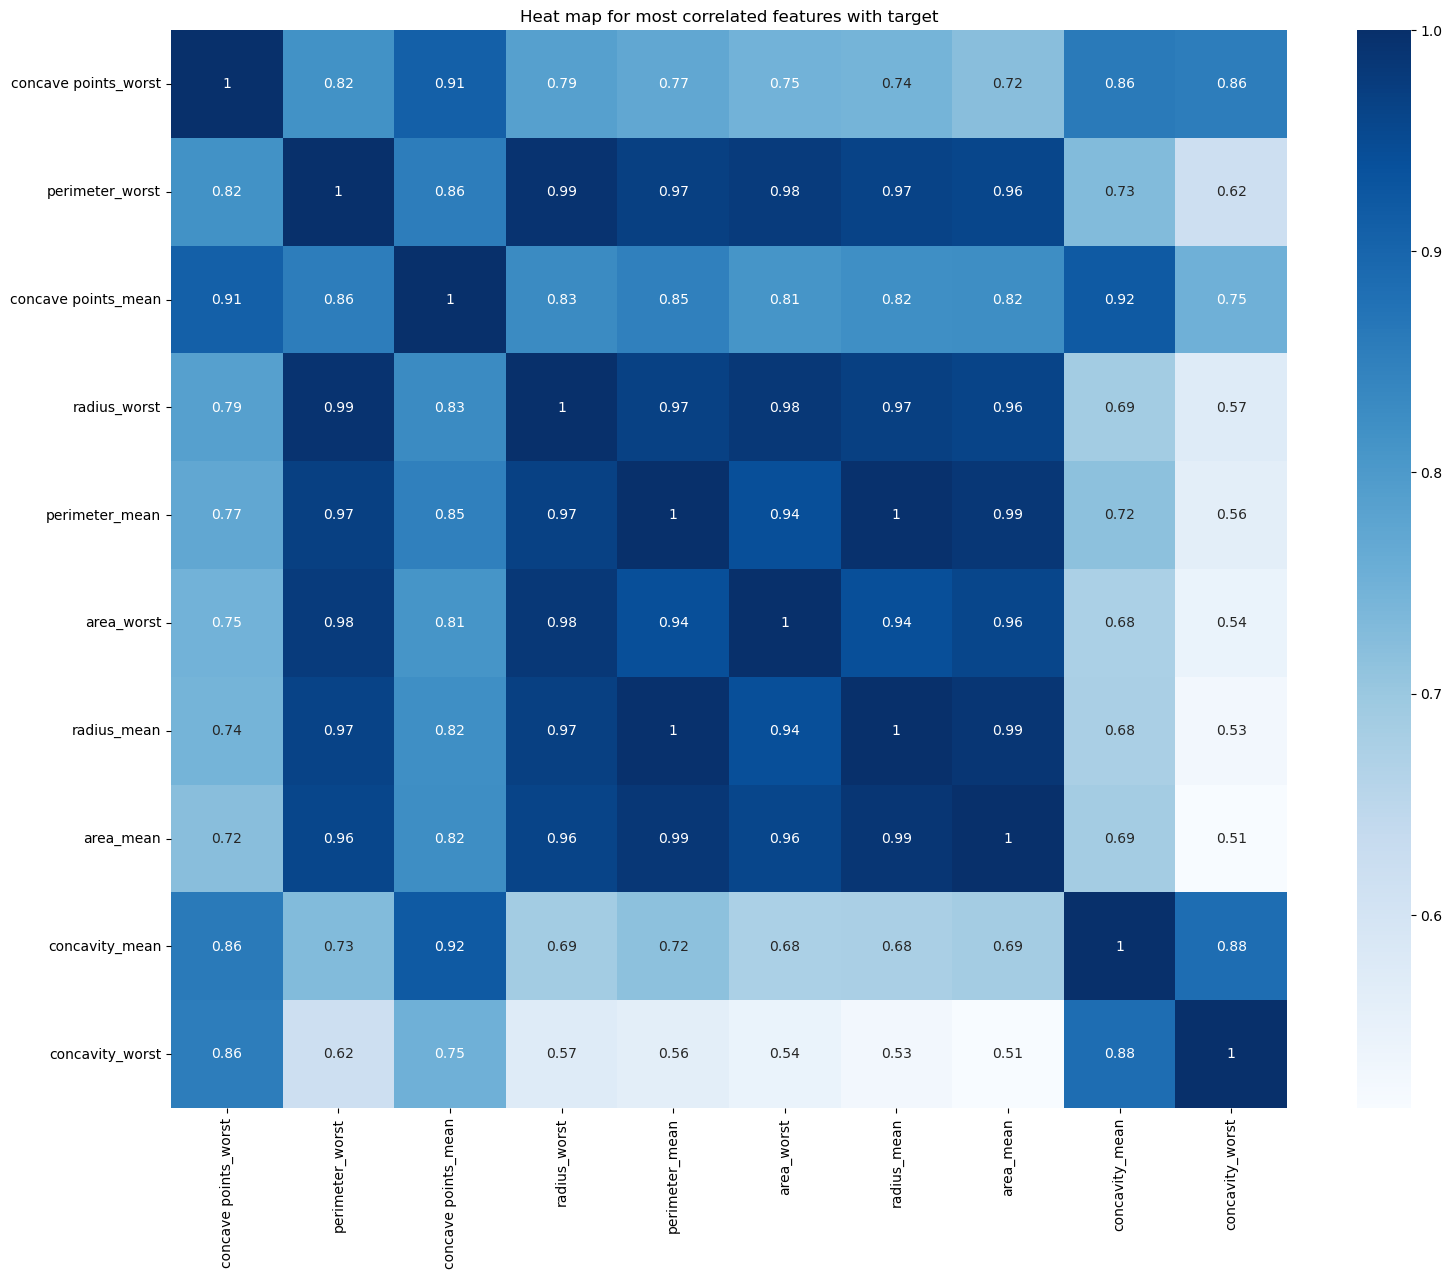

In [13]:
# Plot heat map for 10 best features
plt.figure(figsize=(18, 14))
sns.heatmap(df_best_features.drop('diagnosis', axis=1).corr(), annot=True, cmap='Blues')
plt.title('Heat map for most correlated features with target')
plt.show()

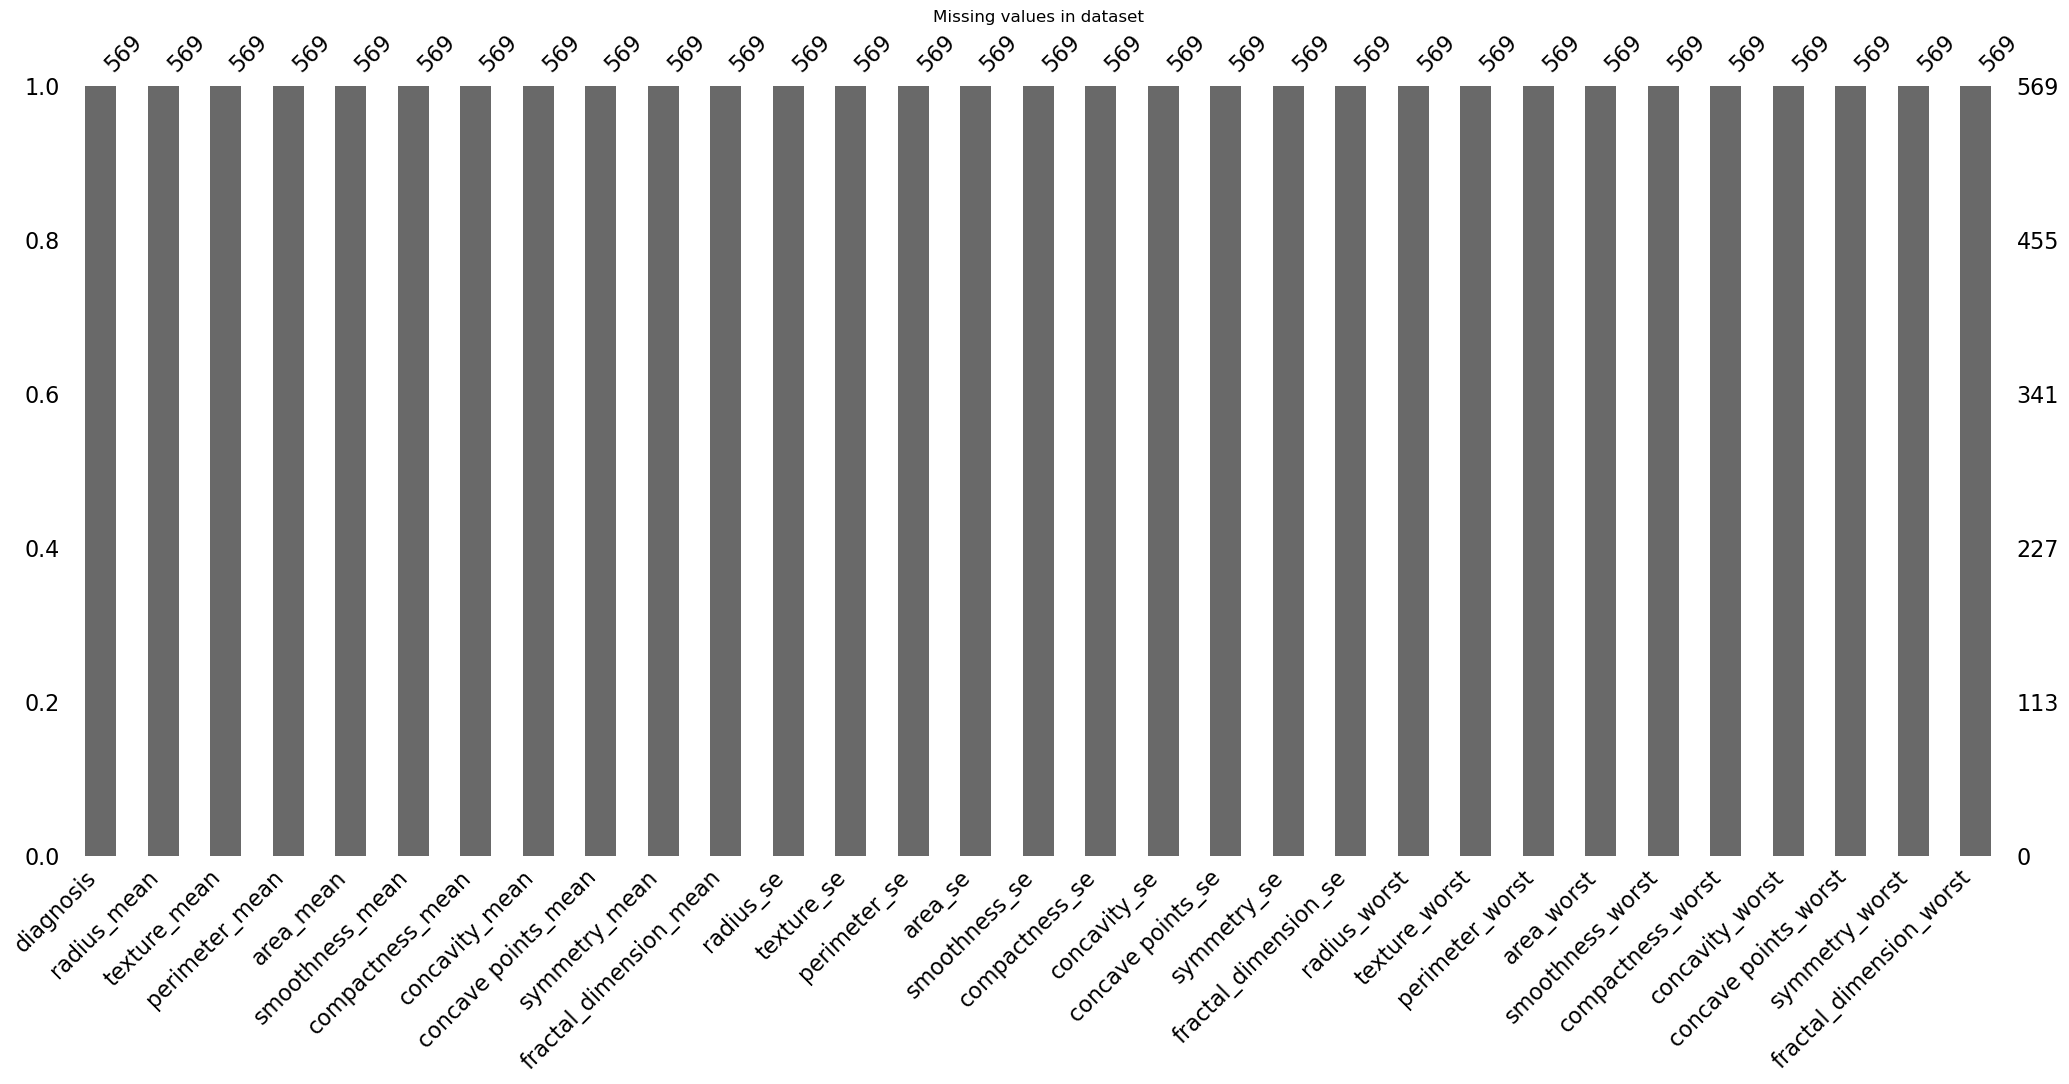

In [14]:
# Check missing values
import missingno as msno

msno.bar(df)
plt.title('Missing values in dataset')
plt.show()

In [15]:
# Rich EDA with dtale
import dtale

dtale.show(df)

### Preprocessing

In [16]:
# Sperate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state=42)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (426, 30)
X_test shape:  (143, 30)
y_train shape:  (426,)
y_test shape:  (143,)


In [18]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Balance target variable
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Make model

In [19]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L2

2023-11-11 11:17:31.050409: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 11:17:31.105553: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 11:17:31.105588: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 11:17:31.105617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 11:17:31.112952: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 11:17:31.113631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### Sequential nueral-network model

<center>
<div style="max-width:600px">
<img src="sequential_model.png" >
</div>
</center>

In [20]:
# Define layers
layers = [
    Input(shape=(X_train.shape[1],), name='Input'),
    Dense(40, activation='relu', name='Dense_1'),
    Dropout(0.2, name='Dropout_1'),
    Dense(30, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02), name='Dense_2'),
    Dropout(0.2, name='Dropout_2'),
    Dense(15, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02), name='Dense_3'),
    Dropout(0.3, name='Dropout_3'),
    Dense(10, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02), name='Dense_4'),
    Dropout(0.3, name='Dropout_4'),
    Dense(5, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02), name='Dense_5'),
    Dropout(0.3, name='Dropout_5'),
    Dense(1, activation='sigmoid', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02), name='Output'),  
]

model_s = Sequential()
sequential_layers = copy.deepcopy(layers)

# Add layers
for layer in sequential_layers:
    model_s.add(copy.deepcopy(layer))

# Compile model
model_s.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 40)                1240      
                                                                 
 Dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 Dense_2 (Dense)             (None, 30)                1230      
                                                                 
 Dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 Dense_3 (Dense)             (None, 15)                465       
                                                                 
 Dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 Dense_4 (Dense)             (None, 10)                1

2023-11-11 11:17:32.884025: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 11:17:32.885169: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


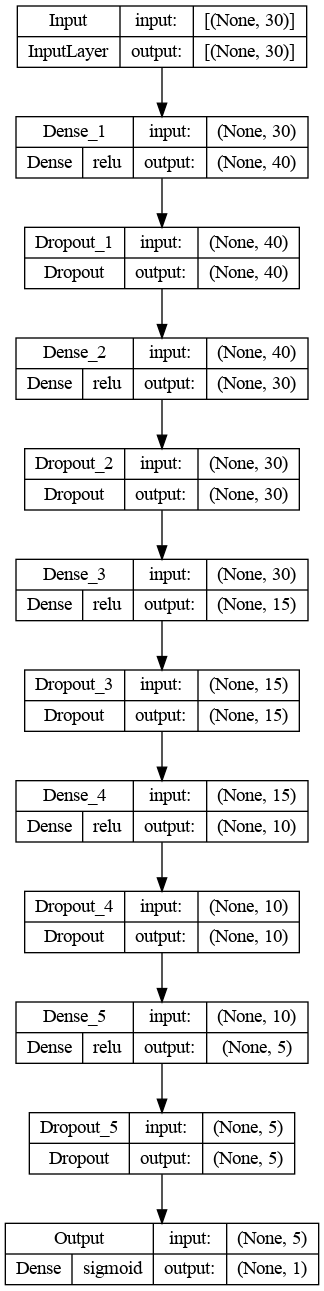

In [21]:
keras.utils.plot_model(model_s, show_shapes=True, show_layer_activations=True, to_file='ans_sequential_model.png')

### Train model

In [22]:
# Train the sequential model
history_s = model_s.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
    shuffle=True,
)

Epoch 1/200
14/14 [==============================] - 2s 22ms/step - loss: 2.4860 - accuracy: 0.4356 - val_loss: 2.3663 - val_accuracy: 0.9533
Epoch 2/200
14/14 [==============================] - 0s 6ms/step - loss: 2.3074 - accuracy: 0.5808 - val_loss: 2.2195 - val_accuracy: 0.7290
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 2.1664 - accuracy: 0.6792 - val_loss: 2.0638 - val_accuracy: 0.7757
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 2.0323 - accuracy: 0.6885 - val_loss: 1.9273 - val_accuracy: 0.8131
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 1.9014 - accuracy: 0.7447 - val_loss: 1.7869 - val_accuracy: 0.9346
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 1.7936 - accuracy: 0.7635 - val_loss: 1.6710 - val_accuracy: 0.9907
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 1.6830 - accuracy: 0.7658 - val_loss: 1.5562 - val_accuracy: 1.0000
Epoch 8/200


In [23]:
# Evaluate the model on train data
loss, accuracy = model_s.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
loss, accuracy = model_s.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

17/17 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.9906
Train Loss: 0.2568, Train Accuracy: 0.9906
5/5 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9720
Test Loss: 0.2784, Test Accuracy: 0.9720


### Functional nueral-network model

<center>
<div style="max-width:600px">
<img src="functional_model.png" >
</div>
</center>

In [24]:
# Implement the model using Functional API
functional_layers = copy.deepcopy(layers)
input_layer = functional_layers[0]
output_layer = input_layer
for _, layer in enumerate(functional_layers[1:-1]):
    output_layer = layer(output_layer)

output_layer = concatenate([output_layer, input_layer], name='Concatenate')
output_layer = functional_layers[-1](output_layer)

model_f = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model_f.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

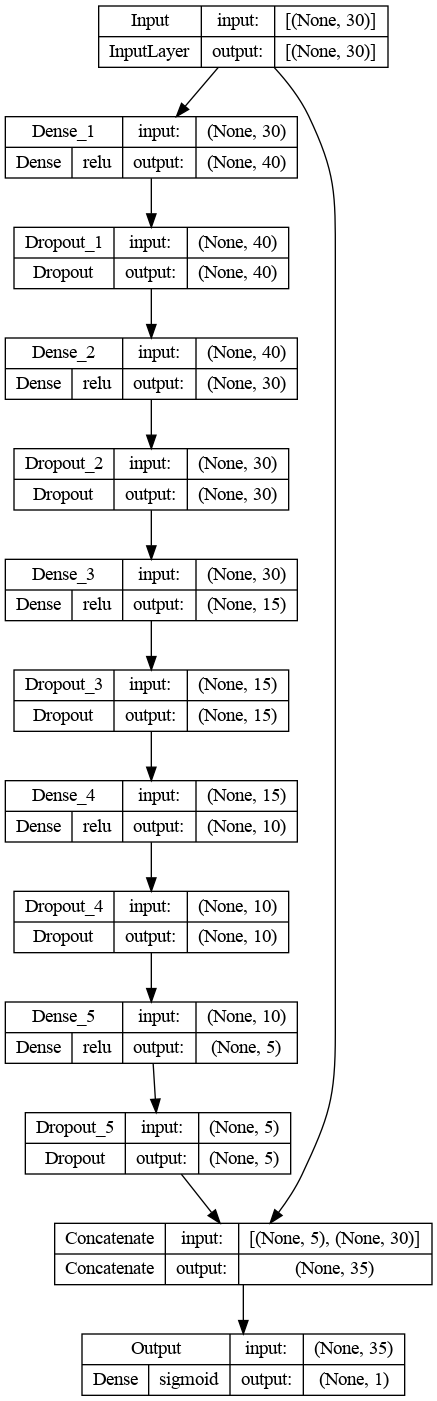

In [25]:
keras.utils.plot_model(model_f, show_shapes=True, show_layer_activations=True, to_file='ans_functional_model.png')

### Train functional model

In [26]:
 # Train the functional model
history_f = model_f.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
    shuffle=True,
)

Epoch 1/200


14/14 [==============================] - 1s 16ms/step - loss: 2.4393 - accuracy: 0.6066 - val_loss: 2.6010 - val_accuracy: 0.0000e+00
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 2.2729 - accuracy: 0.5831 - val_loss: 2.3922 - val_accuracy: 0.0000e+00
Epoch 3/200
14/14 [==============================] - 0s 4ms/step - loss: 2.1146 - accuracy: 0.5855 - val_loss: 2.2206 - val_accuracy: 0.0093
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 1.9717 - accuracy: 0.5808 - val_loss: 2.0572 - val_accuracy: 0.0187
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 1.8410 - accuracy: 0.6230 - val_loss: 1.9296 - val_accuracy: 0.0187
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 1.7318 - accuracy: 0.6112 - val_loss: 1.8010 - val_accuracy: 0.0280
Epoch 7/200
14/14 [==============================] - 0s 7ms/step - loss: 1.6275 - accuracy: 0.6581 - val_loss: 1.6879 - val_accuracy: 0.0748
Epoch 8/200
14/1

In [27]:
# Evaluate the model on train data
loss, accuracy = model_f.evaluate(X_train, y_train) 
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

# Evaluate the model on test data
loss, accuracy = model_f.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

 1/17 [>.............................] - ETA: 0s - loss: 0.2480 - accuracy: 1.0000

17/17 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.9813
Train Loss: 0.2636, Train Accuracy: 0.9813
5/5 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9720
Test Loss: 0.2945, Test Accuracy: 0.9720


### Evaluation using diagrams

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
loss_train_s, accuracy_train_s = model_s.evaluate(X_train, y_train)
print(f"Train Loss: {loss_train_s:.4f}, Train Accuracy: {accuracy_train_s:.4f}")

 1/17 [>.............................] - ETA: 0s - loss: 0.2363 - accuracy: 1.0000

17/17 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.9906
Train Loss: 0.2568, Train Accuracy: 0.9906


In [30]:
loss_test_s, accuracy_test_s = model_s.evaluate(X_test, y_test)
print(f"Test Loss: {loss_test_s:.4f}, Test Accuracy: {accuracy_test_s:.4f}")

5/5 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.9720
Test Loss: 0.2784, Test Accuracy: 0.9720


In [31]:
y_pred = model_s.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


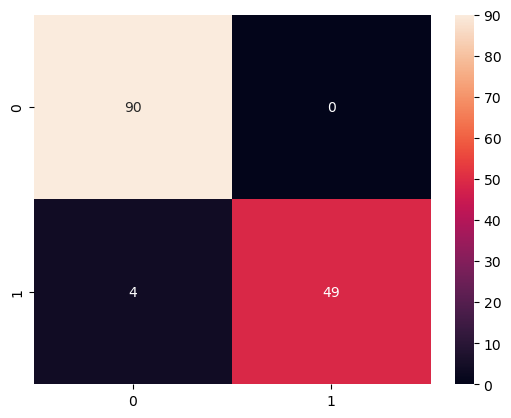

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_sequential.png')

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [34]:
model_s.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 40)                1240      
                                                                 
 Dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 Dense_2 (Dense)             (None, 30)                1230      
                                                                 
 Dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 Dense_3 (Dense)             (None, 15)                465       
                                                                 
 Dropout_3 (Dropout)         (None, 15)                0         
                                                                 
 Dense_4 (Dense)             (None, 10)                1

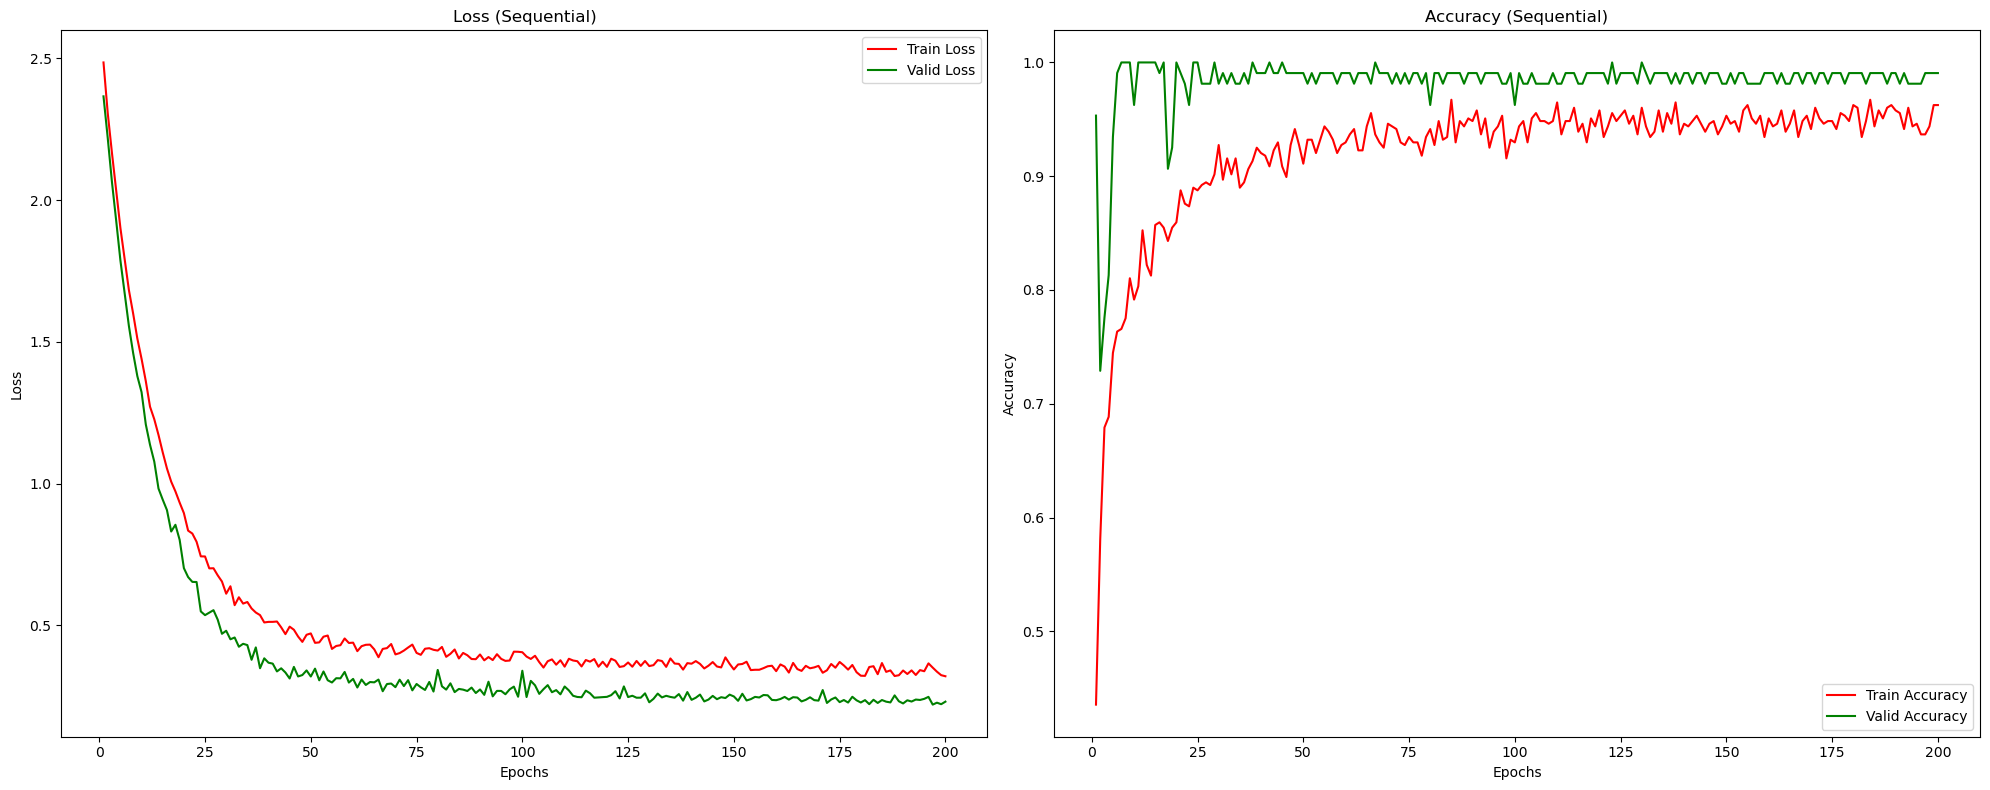

In [35]:
tr_acc = history_s.history['accuracy']
tr_loss = history_s.history['loss']
val_acc = history_s.history['val_accuracy']
val_loss = history_s.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss (Sequential)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy (Sequential)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [36]:
# To-Do (Do the same for Functional API model)
loss_train_f, accuracy_train_f = model_f.evaluate(X_train, y_train)
print(f"Train Loss: {loss_train_f:.4f}, Train Accuracy: {accuracy_train_f:.4f}")

17/17 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.9813
Train Loss: 0.2636, Train Accuracy: 0.9813


In [37]:
loss_test_f, accuracy_test_f = model_f.evaluate(X_test, y_test)
print(f"Test Loss: {loss_test_f:.4f}, Test Accuracy: {accuracy_test_f:.4f}")

5/5 [==============================] - 0s 4ms/step - loss: 0.2945 - accuracy: 0.9720
Test Loss: 0.2945, Test Accuracy: 0.9720


In [38]:
y_pred_f = model_f.predict(X_test)
y_pred_f = (y_pred_f > 0.5)

5/5 [==============================] - 0s 2ms/step


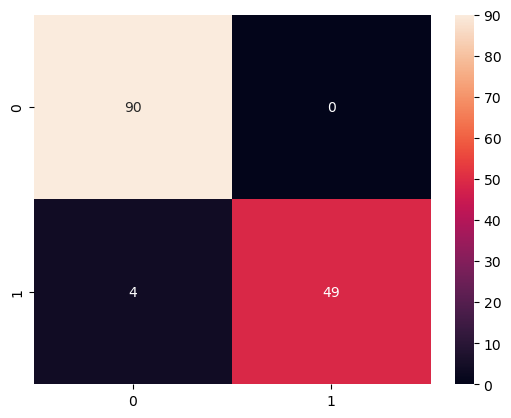

In [39]:
cm = confusion_matrix(y_test, y_pred_f)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_functional.png')

In [40]:
print(classification_report(y_test, y_pred_f))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [41]:
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 30)]                 0         []                            
                                                                                                  
 Dense_1 (Dense)             (None, 40)                   1240      ['Input[0][0]']               
                                                                                                  
 Dropout_1 (Dropout)         (None, 40)                   0         ['Dense_1[0][0]']             
                                                                                                  
 Dense_2 (Dense)             (None, 30)                   1230      ['Dropout_1[0][0]']           
                                                                                              

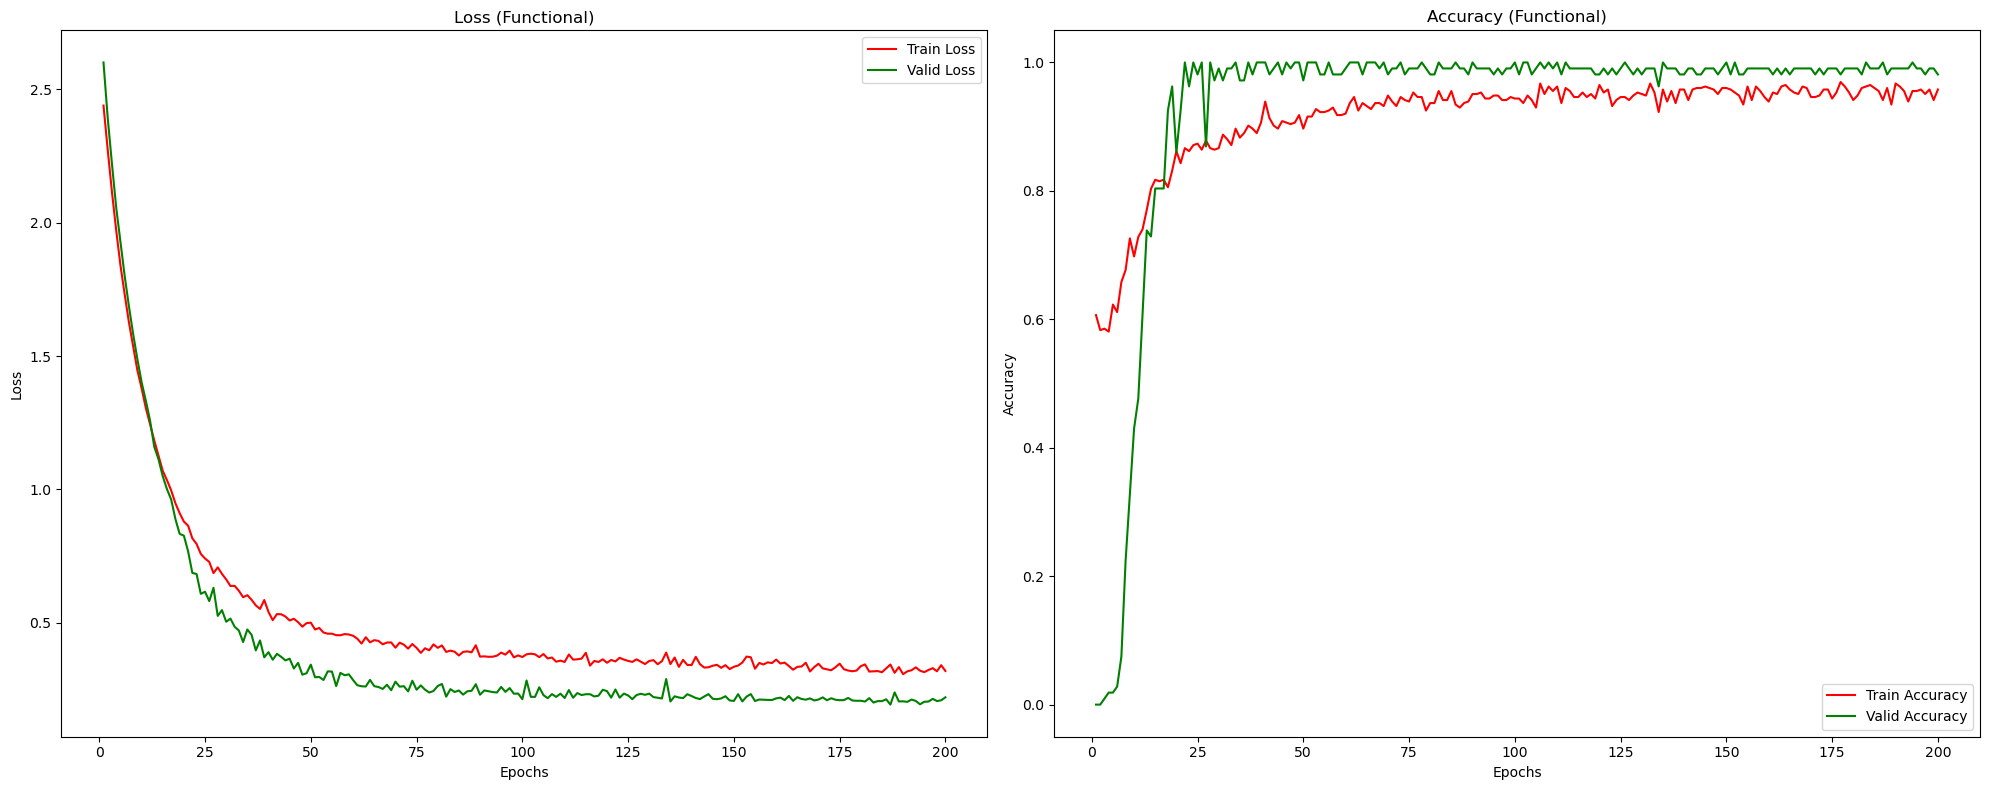

In [42]:
tr_acc = history_f.history['accuracy']
tr_loss = history_f.history['loss']
val_acc = history_f.history['val_accuracy']
val_loss = history_f.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss (Functional)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy (Functional)')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()